In [1]:
# set tf 1.x for colab
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


Read about ill-conditioning: http://cnl.salk.edu/~schraudo/teach/NNcourse/precond.html

In [2]:
import tensorflow as tf
import sys
sys.path.append("../..")
from keras_utils import reset_tf_session
s = reset_tf_session()
print("We're using TF", tf.__version__)
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import matplotlib_utils
from IPython.display import HTML, display_html
import numpy as np

/Users/Victor/anaconda3/envs/tfspark/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Victor/anaconda3/envs/tfspark/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Victor/anaconda3/envs/tfspark/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Victor/anaconda3/envs/tfspark/lib






We're using TF 1.14.0


In [3]:
def plot_gd(x_scale, lr, steps):
    y_guess = tf.Variable([1.5, 1.5], dtype='float32')
    y_true = tf.constant([0.2, 0.2], dtype='float32')

    # x is x_scale times more important in loss (creates valleys)
    loss = tf.reduce_mean((tf.multiply(y_guess, tf.constant([x_scale, 1.])) - y_true)**2)

    step = tf.train.GradientDescentOptimizer(lr).minimize(loss, var_list=y_guess)
    
    # nice figure settings
    fig, ax = plt.subplots(figsize=(5, 5))
    y_true_value = s.run(y_true)
    level_x = np.arange(-2, 2, 0.05)
    level_y = np.arange(-2, 2, 0.05)
    X, Y = np.meshgrid(level_x, level_y)
    Z = (X * x_scale - y_true_value[0])**2 + (Y - y_true_value[1])**2
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    s.run(tf.global_variables_initializer())
    ax.scatter(*s.run(y_true), c='red')
    contour = ax.contour(X, Y, Z, 10)
    ax.clabel(contour, inline=1, fontsize=10)
    line, = ax.plot([], [], lw=2)

    # start animation with empty trajectory
    def init():
        line.set_data([], [])
        return (line,)

    trajectory = [s.run(y_guess)]

    # one animation step (make one GD step)
    def animate(i):
        s.run(step)
        trajectory.append(s.run(y_guess))
        line.set_data(*zip(*trajectory))
        return (line,)

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=steps, interval=20, blit=True)

    anim.save(None, writer=matplotlib_utils.SimpleMovieWriter(0.0001))

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWXYx/twan4qv/A%2Bn/tffBGbVtMt4Z9QsY/gVqxe3jl3eWW/4qjjdtJx1xg4wRlNpbkynCDSk0ruy83vZd3o/uPeqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWN4yu/21Ph7FYTeNf2xvgfpo1TU4dP00XPwL1YNc3UrbY4kA8UZZifToAScAEhiqVKdGDnUkkl1bsu2782vvR7/AEV4z/wg/wDwUL/6Og%2BDP/hh9W/%2Baij/AIQf/goX/wBHQfBn/wAMPq3/AM1FBZ7NRXz1eaz%2B2RYfESy%2BEl1%2B2d8DV8S6hYS3troo%2BBerNO1vGQGlKjxQdi5OAWxuwcZ2nG//AMIP/wAFC/8Ao6D4M/8Ahh9W/wDmoptNbkQqU6jai07Ozs72fZ9nqtN9T2aivGf%2BEH/4KF/9HQfBn/ww%2Brf/ADUUy68If8FArK2kvLz9qj4LQwwoXlll%2BBWqqqKBksSfFOAAOc0iz2mivnL4WeL/ANrn426Xf678Jv21vgZr9hpupyafdX2nfAnV3g%2B0IqsypJ/wlG2UAOvzoWXORnIIHT/8IP8A8FC/%2BjoPgz/4YfVv/moqpRlCXLJWZEKkKsFODTT6rVHs1FeM/wDCD/8ABQv/AKOg%2BDP/AIYfVv8A5qKP%2BEH/AOChf/R0HwZ/8MPq3/zUVJZ7NRXjP/CD/wDBQv8A6Og%2BDP8A4YfVv/moo/4Qf/goX/0dB8Gf/DD6t/8ANRQB7NRXjJ8Ef8FCgMn9qH4MgDqf%2BFD6t/8ANRXM%2BIPGX7U3hJ2j8Vft9/s56Yy/eXUPhLfQkfXf4rFVGMpu0VcUpRirt2PoyivlC4/aS%2BJlo5juv%2BCpn7KETA8rJ4AmU/r4uqxp3x7%2BMOsOItJ/4Kc/ssXTE4C2/wAOrhyf%2B%2BfFxrT6tiUr8kv/AAF/5Gft6D%2B2vvX%2BZ9T0V4RoFv8Atu%2BK4vP8Lftk/AjUkxnfp/wV1KYY9cp4qNaP/CD/APBQv/o6D4M/%2BGH1b/5qKyaadmaJpq6PZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaikM9morxn/hB/%2BChf/R0HwZ/8MPq3/wA1FH/CD/8ABQv/AKOg%2BDP/AIYfVv8A5qKAPZqK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRXKaH45/av8R/EzVvgzpH7b3wJk8VaGsbaloD/AAM1eO5RHjWRZFR/FAMqbWXLpuUH5SQQRVKMpJ2WxEqlODSk0ruyu932Xdn0jRXjP/CD/wDBQv8A6Og%2BDP8A4YfVv/moo/4Qf/goX/0dB8Gf/DD6t/8ANRUlns1FeI6v4c/b70LSrrXNW/ap%2BDENrZ27z3Mx%2BA2rkJGilmbA8UZOACeKoeBJP22Pid4SsfHfw/8A2xfgdq%2Bj6lCJbLULH4Gaq8cq/X/hKOCDkFTgggggEEU7O1%2BhHtKaqezuua17X1tte29r6XPfaK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRWP46n/bX%2BGXh5vFnj/9sP4IaTpkdxDBJfXnwK1ZY0eWRY0DH/hKPlBZlGTwM5JABNIKlSnRpudRpRWrbdkl3beiPfqK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tQWFFFFABRRRQAUUUUAFFFFABXjP7UH/ACW/9nH/ALLNff8AqFeKK9mr56/bv%2BImifCnxp8AvHviCOaS3sPjDelbe2jLy3Er%2BDPE6RQxqOrvIyIB6sKUpKMXJ7Izq1adClKpUdoxTbfZLVnovxz%2BLGseDUsPh/8ADexi1Dxr4kZotCspT%2B6tkH%2BsvbjH3YIgcnuzYUck4vfCr4Z%2BGfgZ4Jnhuda%2B0XU8j3/iXxHqTqsl/ckZkuJWJwo9BnCKAO2ayvgL8MvEWjvf/Fz4qLHL418Tqr6iqtuTS7Ucw6fCeyRg/MR9%2BQsxJ4Nc5%2B0F46uvGlv4j%2BFml%2BCru5ttBexudT1SKS3na3nVo7uFmsXO64t/kXeTtz8yrnaWXGjCVSftJ/Jdl/m%2Bv3dz5%2BdeVKDzHEx99pqlB391Wb1snackrzf2Y2hdWk37Fper6Vrlmuo6LqdveW7/AHJ7WZZEb6MpINcLo3wCtH%2BNt/8AHTx/4jk8QanEDb%2BEbWe2Edv4etCiiRYUyQ00jbi85%2BYrtUBVBB5r4DaZ4ovPG9r440P4fWOg6FqehyNrFxpWqRS6dq02YDaXNpEjbkzGZtxkRSBtT58Bq9nrpfus7sN7LNqEKten8MrrezaWkkna%2B91zJ2lqr2Ugrxj4x/tA%2BMta8cS/s5/svWdpqfjURK3iDXbxS%2Bm%2BErd%2Bk1yR/rbhhkxWwO5sbm2oOYfjZ8ZPHnjzx7L%2By9%2BzNfxxeJBCknjHxe0QltvCVnIODjpJeyLnyoe333wo59B%2BC3wV8B/AXwND4E8AafIkIlae%2BvruUy3Wo3TnMt1cSnmWZzyzH2AwAANYxjSipTV29l%2Br/RdfTeKtevmNaWHw0uWEXac1vfrCH97pKeqhsrz%2BDL%2BA/wCzr4M%2BBGnXl1YXd3rXiTWpBP4n8X6w/mX%2BrT4%2B9I/8Ea9EiXCIvAHUn0CivB/if%2B0h4%2B%2BI/ju%2B/Z5/Y6tbPUPENhJ5Pi3xzfxGXSPCeeqNg4u73H3bZThTgyFQCKUIVcTNv729kvP%2BvJI674TK8PGnCNltGK1be%2Bi3b

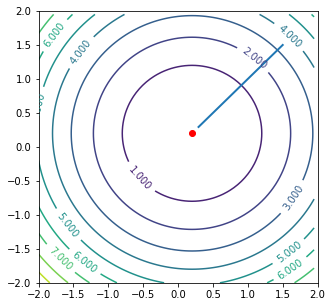

In [4]:
plot_gd(x_scale=1.0, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRXDeOPi7%2B0l8OdZh8M%2BLP28fgJDqs8yxRaRbfA3V7m7ZycAeRD4oaQc9yoHvxQYYjFYbCU%2BevOMF3k0l6ata%2BWr8j6forxn/AIQf/goX/wBHQfBn/wAMPq3/AM1FH/CD/wDBQv8A6Og%2BDP8A4YfVv/mooNz2aivDr/Rf27tKvbXTdT/a6%2BB1tcXzlLK3n%2BCGqI9wwGSqKfFOXI9Bmrf/AAg//BQv/o6D4M/%2BGH1b/wCaigSlFtpPY9morwrxFYftyeENObWPFv7YfwK0u0T791qPwT1OCNfqz%2BKgBXCeFv2iPjv488fWvwy8Bft9fAjX9Yu3dYotC%2BAmt3kKlUZyXnh8TNDGMKcFnGTgDJIFUoTkrpHNWxuCw9SNOrVjGUtEnJJtvayvd/JH1hRXjP8Awg//AAUL/wCjoPgz/wCGH1b/AOaij/hB/wDgoX/0dB8Gf/DD6t/81FSdR7NRXjP/AAg//BQv/o6D4M/%2BGH1b/wCaij/hB/8AgoX/ANHQfBn/AMMPq3/zUUAezUV4z/wg/wDwUL/6Og%2BDP/hh9W/%2Baij/AIQf/goX/wBHQfBn/wAMPq3/AM1FAHs1FeM/8IP/AMFC/wDo6D4M/wDhh9W/%2Baij/hB/%2BChf/R0HwZ/8MPq3/wA1FAHs1FeMP4J/4KERqXk/aj%2BDCgDkn4EasAP/AC6ayNRuv2zNIJGrftsfAG1I6/aPg1qKY/768VCmk3sTKcIK8ml6ux79RXzTefE79ozTyRf/APBRL9mmAjr53wtvFx%2Bfiys%2Bb48fGW3OLj/gpt%2ByymP7/wAObgfz8W1apVXtF/c/8jB43BR3qxX/AG9H/wCSPqaivlT/AIaH%2BK2cf8PQ/wBlTP8A2T2f/wCa6pIvj38YpziD/gpx%2Byw5/wBj4dXB/wDdup%2BwrfyP7n/kT9fwD/5fQ/8AA4f/ACR9T0V8z2nxT/aHvyBY/wDBRf8AZnmz08r4X3bfy8WVr6fqX7YurkDSv23/ANn66J6fZ/g5qD5/LxWal06i3T%2B5/wCRrHE4afwzi/SSf5M%2BgaK8Xi8Gf8FBZ4xLB%2B1L8F3U9GT4E6sQf/Lpp3/CD/8ABQv/AKOg%2BDP/AIYfVv8A5qKg2PZqK8Z/4Qf/AIKF/wDR0HwZ/wDDD6t/81FH/CD/APBQv/o6D4M/%2BGH1b/5qKAPZqK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivGf%2BEH/AOChf/R0HwZ/8MPq3/zUV558Rfjr%2B0R8IvGaeAvij%2B3V8D9A1CWBJom1X9n/AFyG2dXzjFy3iXyc/KcrvyO4GRVRjKTtFXMMRisNg6ftK81CN7Xk0ld7K7aX4n1TRXgvw5%2BI37T%2Bg/tP%2BFvhH8XPil8OPF3h3xd8ONf8Q2N94O8AXujzwzafe6HDF%2B8m1i%2BSaGSPVZCQEU5jQhiCQfeqk2TTV0FFFFAwooooAKKKKACiiigAr5%2B/bk/4WMfiH%2BzynwoOirrjfGi7W1k8QeabWNT4M8T72dYvnYhNxCgjLYBIGTX0DXjH7UjpF8a/2c5JHCqvxlvyzMcAD/hCfFHNBnVh7SnKF2rq107Neaetn52JB%2Byx4p8e/v8A9ob9oDxL4mjf/WaFocv9iaWV/uNHbMJZR7ySnPpXY%2BGvhr8Hv2fvC11ffD74YWel29tbl5o/D2hmW6uAO2IlaWdzx/eJrk/Fv7bfwP0fXJfBvgC61Px/4hhOJNC8Aac2pyxnp%2B9lQiCDB6%2BZIuPwr0vwdrOt%2BIfClhrniHwncaHf3Vsslzo93cxSyWjkcxs8TMjEeqkiqdOUEnJf1%2BZ4mAoZE8RL6pyzqxWs9ajXTWpLm1vvFTXmkczZ/HXQ9W%2BH3ifxpYaBqlrc%2BFbedtT0bV7QwXEUiWy3CoyjdgNG8bAgnh%2BecivKLv46XfjnwXouneIvilIj3fiDT7nxDdaJpN5oappU6uim2mkkLyQfaFCm5jf5gCOFdTXZ/Cf4Q%2BKvD/ibXtVtfB2l%2BE9B1YJHJ4ba/fUPtj%2BZKZ7uQKUSKWRGjUbWfgEvk4AXTfAH7O/ww8cweCfFHj62utR1rSH0zQvC/iLUbeQQac8u9raCIortE0iqAZC5JjVA3AWt4qmm7K/XuctVZtiqUHOSineMr3im%2BbR2un7ySjbR6yskmmeT%2BIDd3sur3fxS07UvEi2Oi3/hax1%2Bz0d7u7h1SwulktZE8mMtFNP5/LqFVntk3YwK%2BnPCcOt6h4C0238WvImoz6RCuptExjdZzEBIQRyp3Z5HIrx%2B6/aU8D/DHwDrGifC34PT6Na6Zp2rP4SU2VtBp2qT2MoiuFiSCUvHiViQsixNIFdl4%2BY9z8IviL4u1jxJq3w6%2BIlzpV3qum21vfWeraLayW9tqNlODskWKSSVoipUqV8x%2BqnJyaqrCo4Xatb%2Bv%2BHNMphh8NiHH2nPKas9Ha929ZO0ntaLa2T11Rg%2BHf2Ev2V9C1Fdd1T4U2/iPUxy2qeMrubWJ3b%2B9m8eQA9/lAr1TSNF0fw/YJpWg6TbWVrEMR21pAscaD2VQAK4b4y%2BPv2gPDWq2eg/BH4B2vilru3Z7jWdV8VQ6dZWD7sBXGySaQ4%2BbCJjHcGuN/4Vp%2B3r4/8An8bftI%2BEfA8B4ax8AeETezFT1H2rUXYA%2B4gH0FTyTqRUp

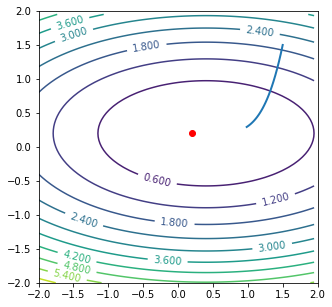

In [5]:
# narrow valleys
plot_gd(x_scale=0.5, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFh4Q/4KBGc2o/ao%2BCxkAyY/wDhRWq7gPXH/CU1UfTv25Y/ECeE5P2wvgWuqyQGaPTG%2BCWpi4aMdXEf/CVbivvjFFmS5wju12%2Bfb18j3Sivny01f9sHUE1Z9P8A24v2frgaCWGufZ/g5qMh08gZInC%2BKj5RABOGxVjwb/w238Q9Cj8T%2BBv2xPgbqunysypd2XwN1WRCw6jI8U8EelPlklsRHEUJyUYzTbvZJp7Oz2b2ej7PR2eh73RXjP8Awg//AAUL/wCjoPgz/wCGH1b/AOaij/hB/wDgoX/0dB8Gf/DD6t/81FI1PZqK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRR/wAIP/wUL/6Og%2BDP/hh9W/8AmooA9morxn/hB/8AgoX/ANHQfBn/AMMPq3/zUUf8IP8A8FC/%2BjoPgz/4YfVv/mooA9morxn/AIQf/goX/wBHQfBn/wAMPq3/AM1FH/CD/wDBQv8A6Og%2BDP8A4YfVv/mooA9morxabwf/AMFArcbrj9qj4LIPV/gTqo/n4pqnPY/tx2v/AB8/tifAqPHXzPgnqY/n4qos2TKcI7tI91or5/m1H9sa3/4%2BP23v2f4/9/4OagP5%2BK6qy%2BLP2rIP9f8At6/s6p/v/CO%2BH/u10%2BWXYyeKwsd6kf8AwKP%2BZ9FUV82yfEP9paH/AF3/AAUJ/ZsT/e%2BFV4P/AHbKgk%2BK37QsX%2Bt/4KM/szL/AL3wvux/7tlPkn2f3MzePwC3rQ/8Dj/8kfTNFfMD/GX47R/6z/gpN%2BzAv1%2BGl0P/AHbajb44fGxPv/8ABS/9lwfX4b3P/wA1tP2dTs/uf%2BRLzLLV/wAv4f8AgcP/AJM%2Bo6K%2BWj8ePjKOv/BTX9lof905uP8A5raT/hfXxi/6Scfss/8Ahurj/wCa6j2dT%2BV/c/8AIX9qZZ/0EU//AAOH/wAmfU1FfLI%2BPXxjPT/gpv8Ass/%2BG5uP/mtpy/HX4ztwv/BTP9ls/T4cXP8A81tHs6n8r%2B5/5B/aeWf8/wCn/wCBw/8Akz6kor5eX42fHB/uf8FLP2Xj9Phtc/8AzW1Inxf%2BPkn%2Br/4KQ/sxN/u/DK6P/u20ezqdn9z/AMilmWXPavD/AMDh/wDJn07RXzRH8T/2jJf9V/wUT/Zob/d%2BFt4f/dsqxF46/afn/wBT/wAFAf2cH/3fhPen/wB2ylyT7P7iljsC9qsP/Ao//JH0fRXzzD4h/a3uP9R%2B3Z%2Bzy%2Bf7nwgvz/LxXVqGT9tK5/49/wBtP4ByZ6bPgxqJ/l4qpcsuxosRh5bTj96/zPfKK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tSNgooooAKKKKACiiigAooooAK%2BfP26PiV4K%2BEfxB/Z68d/ELWTYaVa/Gm6We5FtLMVZ/BnidFASJWc5ZgOAetfQdeM/tQf8lv/AGcf%2ByzX3/qFeKKatfUioqjptU2lK2jauk/NXV/S69Rn/DfX7Pl5x4ai8a60ew0n4caxJn6E2oB/Ok/4bUsrn/kD/su/Gi9B%2B6V%2BHstuD%2BNy8de1UEgDJOAOpNac1L%2BX8f8AgHl/Vc5l8WKivSlH/wBumzxb/hqj4s6l/wAi1%2Bw58TZc/d/tSbSbL8996cV6j4A17xP4n8IWeu%2BMvAtx4a1K4Vzc6Jd30FzJakOyqGkgZo2yoDfKTjdg8g0zWPiX8OPDuf8AhIPiBoljt%2B99s1WGLH/fTCr%2BgeIvD/ivSIfEHhbXLPUrC4DG3vdPukmhlwxU7XQlWwwIOD1BFKfw6Rt9/wCpthKVanWftMS6jt8Nqcbedo6%2BWrseFeNp/hroX7Vuh%2BJfCuseFjqFtc3K%2BJ9L0TS0i1aHNnK0l5fXCOWkt1UR/u5EX5irB2O1az/FWlT3HxcutKt9DvJfFGo/EfSNZ0HWItOkZToixwLN/pAXYiRql0DEzDO5QAd4r0XUfHHxT8NfH3RPA%2Bpa7oWqaV4iF7LHpVho8sV5pdrBFuW5lmM7rIpkKRH93GN0igEng4esfEb4k%2BFf2jrix8daz4h0/wAHXF5YWfh1rbQbNtOurmdNnkzXB3XCyNOVVcBUBKgtzx0RUna38vf%2Bv%2BGPErYSi%2BfmbSdXW0dE2ld6tpXSTUukntd2PMn%2BGHjbxR4QXwj4f%2BGuqw6n4c8C3%2Bna2l7pklvDqF0moRTxQQzSKI7gTFJZg8bMq7gHKs2K9u%2BA9vqWo%2BIPGXj1vDupaRpuvazDJptjq1i9rO%2By3RZJ2hcBk3v8vzAEiLPQivGdY/aD%2BNvhj4aXXxGuvHrX7eIvC2s31vZSafbpHoU1nc7MwmONXKLFkETNI3mAHcB8lexfA/UPEui%2BOvGPwj1vxXqOvW3h17CbT9W1eRHumW6id2ikdFVWKNHkfKDtkX2qq0Kiptu34/P8f%2BARlVHCU8ZTcHK/mopfC1HZt/Cne2jesrPQg8e/CP8AaP8AE3i291fwd%2B1vdeG9JndTZ6Pa%2BCNPuWtgEUEedOGL5YM2SON2O1ZH/DNXx/vP%2BQ1%2B3b44kz1%2Bw%2BH9Gtv/AEG0OK0fiD%2B0J8XfCvjG%2B8KeDf2PPG/iaC0dVi1mz1LS7a0usorZjM90r4BJU7lHKnt

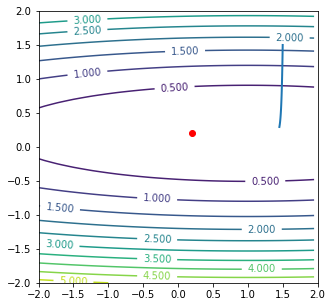

In [6]:
# narrower valleys
plot_gd(x_scale=0.2, lr=0.1, steps=25)

<img src="%2BTl5ufo6erx8vP09fb3%2BPn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3%2BPn6/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBsssUETTzyKiIpZ3c4CgdST2Fcn8Jfj/8CPj5ZX2pfAr41%2BEfGttplwINSuPCXiS11JLSUjIjla3kcRsQCdrYOK6m/lt4bGaa7haSJImaWNIWkLKAcgIoJckfwgEnoAa%2BTv2JfilafGD41eMf2ofGvwp%2BIXgvVPEun6T4V8NeDNd%2BEOv6U2k6HZ3F9JaPdzXFjHFJczS3VxLJ5btDaRNBEWDeZJKAfR/g742/Bn4ieL9d%2BHvw/wDi54Y13X/C04h8TaHo%2Bv291eaRISwCXUMbs9uxKsAJApyp9DXT18PfsKfD/wCIOl/GH4U%2BGNW%2BFHijQ9R%2BE/wz8Y6D8Ste1nw1dWVnqep3%2Bs6XNC1rdTRrFqa3L2d3fedbvKsYceYUkmK17L%2B1B40/a%2B8GfGL4b%2BGfgv8AFL4babofxA8XyeHzb%2BKPhpqGp3dg8WharqjXHnQa1aJKGbTVjEflLtEpbe23BAPfKK8Z/wCEH/4KF/8AR0HwZ/8ADD6t/wDNRR/wg/8AwUL/AOjoPgz/AOGH1b/5qKAPZqK8Z/4Qf/goX/0dB8Gf/DD6t/8ANRR/wg//AAUL/wCjoPgz/wCGH1b/AOaigD2aivFh4Q/4KBGc2o/ao%2BCxkAyY/wDhRWq7gPXH/CU1UfTv25Y/ECeE5P2wvgWuqyQGaPTG%2BCWpi4aMdXEf/CVbivvjFFmS5wju12%2Bfb18j3Sivny01f9sHUE1Z9P8A24v2frgaCWGufZ/g5qMh08gZInC%2BKj5RABOGxVjwb/w238Q9Cj8T%2BBv2xPgbqunysypd2XwN1WRCw6jI8U8EelPlklsRHEUJyUYzTbvZJp7Oz2b2ej7PR2eh73RXjP8Awg//AAUL/wCjoPgz/wCGH1b/AOaij/hB/wDgoX/0dB8Gf/DD6t/81FI1PZqK8Z/4Qf8A4KF/9HQfBn/ww%2Brf/NRR/wAIP/wUL/6Og%2BDP/hh9W/8AmooA9morxn/hB/8AgoX/ANHQfBn/AMMPq3/zUUf8IP8A8FC/%2BjoPgz/4YfVv/mooA9morxn/AIQf/goX/wBHQfBn/wAMPq3/AM1FH/CD/wDBQv8A6Og%2BDP8A4YfVv/mooA9morxabwf/AMFArcbrj9qj4LIPV/gTqo/n4pqnPY/tx2v/AB8/tifAqPHXzPgnqY/n4qos2TKcI7tI91or5/m1H9sa3/4%2BP23v2f4/9/4OagP5%2BK6qy%2BLP2rIP9f8At6/s6p/v/CO%2BH/u10%2BWXYyeKwsd6kf8AwKP%2BZ9FUV82yfEP9paH/AF3/AAUJ/ZsT/e%2BFV4P/AHbKgk%2BK37QsX%2Bt/4KM/szL/AL3wvux/7tlPkn2f3MzePwC3rQ/8Dj/8kfTNFfMD/GX47R/6z/gpN%2BzAv1%2BGl0P/AHbajb44fGxPv/8ABS/9lwfX4b3P/wA1tP2dTs/uf%2BRLzLLV/wAv4f8AgcP/AJM%2Bo6K%2BWj8ePjKOv/BTX9lof905uP8A5raT/hfXxi/6Scfss/8Ahurj/wCa6j2dT%2BV/c/8AIX9qZZ/0EU//AAOH/wAmfU1FfLI%2BPXxjPT/gpv8Ass/%2BG5uP/mtpy/HX4ztwv/BTP9ls/T4cXP8A81tHs6n8r%2B5/5B/aeWf8/wCn/wCBw/8Akz6kor5eX42fHB/uf8FLP2Xj9Phtc/8AzW1Inxf%2BPkn%2Br/4KQ/sxN/u/DK6P/u20ezqdn9z/AMilmWXPavD/AMDh/wDJn07RXzRH8T/2jJf9V/wUT/Zob/d%2BFt4f/dsqxF46/afn/wBT/wAFAf2cH/3fhPen/wB2ylyT7P7iljsC9qsP/Ao//JH0fRXzzD4h/a3uP9R%2B3Z%2Bzy%2Bf7nwgvz/LxXVqGT9tK5/49/wBtP4ByZ6bPgxqJ/l4qpcsuxosRh5bTj96/zPfKK8J8CeO/2qfCX7VPhr4K/Gr4k/DzxPonif4eeIddt7jwn8Pb7Rbm1udOvtEgQF59YvklidNUlJARCDGhDYyD7tSNgooooAKKKKACiiigAooooAK%2BfP26PiV4K%2BEfxB/Z68d/ELWTYaVa/Gm6We5FtLMVZ/BnidFASJWc5ZgOAetfQdeM/tQf8lv/AGcf%2ByzX3/qFeKKatfUioqjptU2lK2jauk/NXV/S69Rn/DfX7Pl5x4ai8a60ew0n4caxJn6E2oB/Ok/4bUsrn/kD/su/Gi9B%2B6V%2BHstuD%2BNy8de1UEgDJOAOpNac1L%2BX8f8AgHl/Vc5l8WKivSlH/wBumzxb/hqj4s6l/wAi1%2Bw58TZc/d/tSbSbL8996cV6j4A17xP4n8IWeu%2BMvAtx4a1K4Vzc6Jd30FzJakOyqGkgZo2yoDfKTjdg8g0zWPiX8OPDuf8AhIPiBoljt%2B99s1WGLH/fTCr%2BgeIvD/ivSIfEHhbXLPUrC4DG3vdPukmhlwxU7XQlWwwIOD1BFKfw6Rt9/wCpthKVanWftMS6jt8Nqcbedo6%2BWrseFeNp/hroX7Vuh%2BJfCuseFjqFtc3K%2BJ9L0TS0i1aHNnK0l5fXCOWkt1UR/u5EX5irB2O1az/FWlT3HxcutKt9DvJfFGo/EfSNZ0HWItOkZToixwLN/pAXYiRql0DEzDO5QAd4r0XUfHHxT8NfH3RPA%2Bpa7oWqaV4iF7LHpVho8sV5pdrBFuW5lmM7rIpkKRH93GN0igEng4esfEb4k%2BFf2jrix8daz4h0/wAHXF5YWfh1rbQbNtOurmdNnkzXB3XCyNOVVcBUBKgtzx0RUna38vf%2Bv%2BGPErYSi%2BfmbSdXW0dE2ld6tpXSTUukntd2PMn%2BGHjbxR4QXwj4f%2BGuqw6n4c8C3%2Bna2l7pklvDqF0moRTxQQzSKI7gTFJZg8bMq7gHKs2K9u%2BA9vqWo%2BIPGXj1vDupaRpuvazDJptjq1i9rO%2By3RZJ2hcBk3v8vzAEiLPQivGdY/aD%2BNvhj4aXXxGuvHrX7eIvC2s31vZSafbpHoU1nc7MwmONXKLFkETNI3mAHcB8lexfA/UPEui%2BOvGPwj1vxXqOvW3h17CbT9W1eRHumW6id2ikdFVWKNHkfKDtkX2qq0Kiptu34/P8f%2BARlVHCU8ZTcHK/mopfC1HZt/Cne2jesrPQg8e/CP8AaP8AE3i291fwd%2B1vdeG9JndTZ6Pa%2BCNPuWtgEUEedOGL5YM2SON2O1ZH/DNXx/vP%2BQ1%2B3b44kz1%2Bw%2BH9Gtv/AEG0OK0fiD%2B0J8XfCvjG%2B8KeDf2PPG/iaC0dVi1mz1LS7a0usorZjM90r4BJU7lHKnt

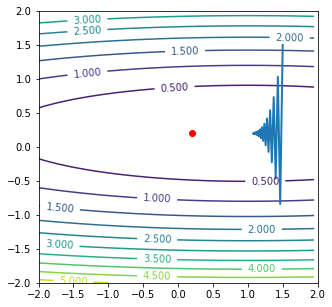

In [7]:
# bigger learning rate then?
# x is changed faster, but y changes are too big, leads to oscillation
plot_gd(x_scale=0.2, lr=1.8, steps=25)